Main dataset emotion distribution:
emotion
happiness    20000
sadness      20000
anger        20000
fear         20000
neutral      18423
surprise     17752
disgust       1085
Name: count, dtype: int64

Test dataset emotion distribution:
emotion
neutral      347
surprise     299
happiness    182
fear          54
anger         34
sadness       24
disgust        1
Name: count, dtype: int64

Balanced dataset emotion distribution:
emotion
disgust      30000
surprise     30000
anger        30000
sadness      30000
neutral      30000
fear         30000
happiness    30000
Name: count, dtype: int64


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_transform.weight', 'vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_projector.bias']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should 

Epoch 1/10
11157/11157 [==============================] - ETA: 0s - loss: 0.2533 - sparse_categorical_accuracy: 0.9079          
Epoch 1: val_loss improved from inf to 0.15383, saving model to ./best_model


INFO: Assets written to: ./best_model/assets


11157/11157 [==============================] - 410s 35ms/step - loss: 0.2533 - sparse_categorical_accuracy: 0.9079 - val_loss: 0.1538 - val_sparse_categorical_accuracy: 0.9417
Epoch 2/10
11157/11157 [==============================] - ETA: 0s - loss: 0.1322 - sparse_categorical_accuracy: 0.9482  
Epoch 2: val_loss improved from 0.15383 to 0.12960, saving model to ./best_model


INFO: Assets written to: ./best_model/assets


11157/11157 [==============================] - 356s 32ms/step - loss: 0.1322 - sparse_categorical_accuracy: 0.9482 - val_loss: 0.1296 - val_sparse_categorical_accuracy: 0.9500
Epoch 3/10
11157/11157 [==============================] - ETA: 0s - loss: 0.1054 - sparse_categorical_accuracy: 0.9574  
Epoch 3: val_loss improved from 0.12960 to 0.11355, saving model to ./best_model


INFO: Assets written to: ./best_model/assets


11157/11157 [==============================] - 345s 31ms/step - loss: 0.1054 - sparse_categorical_accuracy: 0.9574 - val_loss: 0.1135 - val_sparse_categorical_accuracy: 0.9561
Epoch 4/10
11157/11157 [==============================] - ETA: 0s - loss: 0.0881 - sparse_categorical_accuracy: 0.9640  
Epoch 4: val_loss improved from 0.11355 to 0.10862, saving model to ./best_model


INFO: Assets written to: ./best_model/assets


11157/11157 [==============================] - 372s 33ms/step - loss: 0.0881 - sparse_categorical_accuracy: 0.9640 - val_loss: 0.1086 - val_sparse_categorical_accuracy: 0.9606
Epoch 5/10
11157/11157 [==============================] - ETA: 0s - loss: 0.0759 - sparse_categorical_accuracy: 0.9681  
Epoch 5: val_loss improved from 0.10862 to 0.10709, saving model to ./best_model


INFO: Assets written to: ./best_model/assets


11157/11157 [==============================] - 359s 32ms/step - loss: 0.0759 - sparse_categorical_accuracy: 0.9681 - val_loss: 0.1071 - val_sparse_categorical_accuracy: 0.9624
Epoch 6/10
11157/11157 [==============================] - ETA: 0s - loss: 0.0700 - sparse_categorical_accuracy: 0.9702  
Epoch 6: val_loss did not improve from 0.10709
11157/11157 [==============================] - 345s 31ms/step - loss: 0.0700 - sparse_categorical_accuracy: 0.9702 - val_loss: 0.1077 - val_sparse_categorical_accuracy: 0.9629
Epoch 7/10
11157/11157 [==============================] - ETA: 0s - loss: 0.0684 - sparse_categorical_accuracy: 0.9708  
Epoch 7: val_loss did not improve from 0.10709
11157/11157 [==============================] - 337s 30ms/step - loss: 0.0684 - sparse_categorical_accuracy: 0.9708 - val_loss: 0.1081 - val_sparse_categorical_accuracy: 0.9630
Epoch 7: early stopping
Restoring model weights from the end of the best epoch: 5.

Evaluating on validation set...
1969/1969 [=========

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


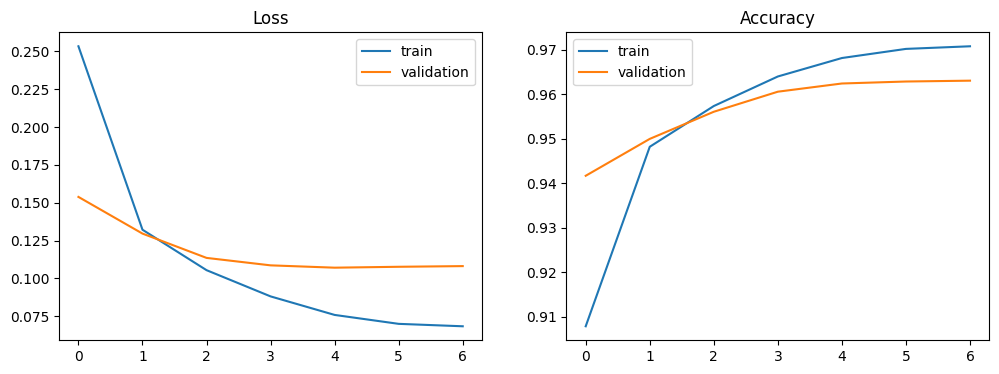

In [10]:
### 1. IMPORTS ###
import pandas as pd
import tensorflow as tf
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from transformers import DistilBertTokenizer, TFDistilBertForSequenceClassification

### 2. LOADING DATASETS ###
df_main = pd.read_csv('../datasets/dataset_v2.csv', encoding="latin1")
df_test = pd.read_csv('../datasets/group 11_url1.csv', encoding="latin1")

df_main = df_main.dropna(subset=["text", "dominant_emotion"])
df_main = df_main.rename(columns={"dominant_emotion": "emotion"})

df_test = df_test.dropna(subset=["Translation", "Emotion"])
df_test = df_test.rename(columns={"Translation": "text", "Emotion": "emotion"})

### 3. MAPPING OF THE TEST SET ###
# Mapping emotions
df_test['emotion'] = df_test['emotion'].map({
    'neutral': 'neutral', 'disgust': 'disgust', 'surprise': 'surprise', 'curiosity': 'surprise',
    'excitement': 'happiness', 'fear': 'fear', 'optimism': 'happiness', 'nervousness': 'fear',
    'confusion': 'neutral', 'annoyance': 'anger', 'caring': 'happiness', 'disapproval': 'anger',
    'approval': 'happiness', 'disappointment': 'sadness', 'admiration': 'happiness',
    'desire': 'happiness', 'amusement': 'happiness', 'sadness': 'sadness', 'pride': 'happiness',
    'gratitude': 'happiness', 'realization': 'happiness', 'relief': 'happiness',
    'remorse': 'sadness', 'joy': 'happiness', 'love': 'happiness', 'anger': 'anger'
}).fillna('Other')

### 4. PREPORCESSING THE DATA ###
df_main = df_main[['text', 'emotion']]
df_test = df_test[['text', 'emotion']]

# Print emotion distributions
print("Main dataset emotion distribution:")
print(df_main['emotion'].value_counts())
print("\nTest dataset emotion distribution:")
print(df_test['emotion'].value_counts())

### 5. HANDLING CLASS IMBALANCE ###
# Instead of upsampling everything to max, downsample majority classes and moderately upsample minorities
emotions = df_main['emotion'].value_counts()
median_count = df_main['emotion'].value_counts().median()
target_count = int(median_count * 1.5)  # A more moderate target

balanced_dfs = []
for emotion, count in emotions.items():
    subset = df_main[df_main['emotion'] == emotion]
    if count > target_count:
        # Downsample majority classes
        balanced_dfs.append(resample(subset, replace=False, n_samples=target_count, random_state=42))
    elif count < target_count:
        # Moderately upsample minority classes
        balanced_dfs.append(resample(subset, replace=True, n_samples=target_count, random_state=42))
    else:
        balanced_dfs.append(subset)

df_balanced = pd.concat(balanced_dfs)
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

print("\nBalanced dataset emotion distribution:")
print(df_balanced['emotion'].value_counts())

### 6. SPLITING INTO TRAIN VALIDATION SETS ###
# 85% train, 15% test
train_df, val_df = train_test_split(df_balanced, test_size=0.15, random_state=42, stratify=df_balanced['emotion'])

### 7. ENCODING THE LABELS ###
label_encoder = LabelEncoder()
train_df['label'] = label_encoder.fit_transform(train_df['emotion'])
val_df['label'] = label_encoder.transform(val_df['emotion'])
df_test['label'] = label_encoder.transform(df_test['emotion'])

### 8. TOKENIZING THE INPUTS ###
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")

def tokenize_texts(texts):
    return tokenizer(list(texts), truncation=True, padding=True, return_tensors="tf", max_length=128)

train_encodings = tokenize_texts(train_df["text"])
val_encodings = tokenize_texts(val_df["text"])
test_encodings = tokenize_texts(df_test["text"])

train_labels = tf.convert_to_tensor(train_df["label"].values, dtype=tf.int32)
val_labels = tf.convert_to_tensor(val_df["label"].values, dtype=tf.int32)
test_labels = tf.convert_to_tensor(df_test["label"].values, dtype=tf.int32)

### 9. FINAL DATASET PREPARATION ###
# Putting labels and text together for batching
def create_dataset(encodings, labels, batch_size=16, is_training=False):
    dataset = tf.data.Dataset.from_tensor_slices((dict(encodings), labels))
    if is_training:
        dataset = dataset.shuffle(1000)
    return dataset.batch(batch_size)

train_dataset = create_dataset(train_encodings, train_labels, is_training=True)
val_dataset = create_dataset(val_encodings, val_labels)
test_dataset = create_dataset(test_encodings, test_labels)

### 10. MODEL SETUP ###
# I increased the dropout rate of the model to combat overfitting
model = TFDistilBertForSequenceClassification.from_pretrained(
    "distilbert-base-uncased", 
    num_labels=len(label_encoder.classes_),
    dropout=0.3  # Increase dropout for regularization
)

# Learning rate schedule with warmup and decay
initial_learning_rate = 3e-5
lr_schedule = tf.keras.optimizers.schedules.PolynomialDecay(
    initial_learning_rate,
    decay_steps=train_dataset.cardinality().numpy() * 5,  # 5 epochs
    end_learning_rate=1e-6,
    power=1.0  # Linear decay
)

optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule, weight_decay=0.01)
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metrics = [tf.keras.metrics.SparseCategoricalAccuracy()]

model.compile(optimizer=optimizer, loss=loss_fn, metrics=metrics)

### 11. FAVORITE PART: TRAINING ###
# Early stopping because we dont want no overfitting
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=2,
    restore_best_weights=True,
    verbose=1
)

# Model checkpoints to save the best output
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath='./best_model',
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

# Training
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=10,  # Train for more epochs but use early stopping
    callbacks=[early_stopping, model_checkpoint]
)

### 12. PLOTTING THE LEARNING CURVES ###
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['sparse_categorical_accuracy'], label='train')
plt.plot(history.history['val_sparse_categorical_accuracy'], label='validation')
plt.title('Accuracy')
plt.legend()
plt.savefig('learning_curves.png')

### 13. TESTING ###
print("\nEvaluating on validation set...")
val_results = model.evaluate(val_dataset)
print("Validation Loss:", val_results[0])
print("Validation Accuracy:", val_results[1])

print("\nEvaluating on test set...")
test_results = model.evaluate(test_dataset)
print("Test Loss:", test_results[0])
print("Test Accuracy:", test_results[1])

predictions = model.predict(test_dataset).logits
predicted_labels = np.argmax(predictions, axis=-1)

# Print classification report
print("\nClassification Report:")
print(classification_report(test_labels, predicted_labels, target_names=label_encoder.classes_))

### 14. ERROR ANALYSIS (task 8) ###
test_texts_list = list(df_test["text"])
test_emotions = list(df_test["emotion"])

# Get indices of misclassified examples
misclassified_indices = np.where(predicted_labels != test_labels)[0]

print("\nSample of misclassified examples:")
for i in misclassified_indices[:20]:  # Show first 20 errors
    print(f"Text: {test_texts_list[i][:100]}...")
    print(f"True emotion: {test_emotions[i]}")
    print(f"Predicted emotion: {label_encoder.classes_[predicted_labels[i]]}")
    print("-" * 50)